<img style = "float: right" src = "https://brighterion.com/wp-content/uploads/2016/07/Neural.jpg" width = "300"/>

## From Logistic Regression to Deep Learning

Learning objectives:
* [Objective 1] OLS
* [Objective 2] Logistic Regression
* [Objective 3] Neural Network
* [Objective 4] OLS Cannot Handle Multicolinearity
* [Objective 5] Deep learning is imune of multicolinearity
* [Objective 6] Decision Tree is imune of multicolinearity
* [Objective 7] Which one is more complex (more weighting coefficients)?
* [Objective 8] Build more hidden layers
* [Objective 9] Standardize data for better modeling performance
* [Objective 10] L1 and L2 Regularization
* [Objective 11] Dropout Regularization

### Load a dataset

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
X, y = load_boston(return_X_y=True)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.columns = load_boston().feature_names
          # 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
          # 'TAX', 'PTRATIO', 'B', 'LSTAT'
features = ['CRIM','ZN','RM','AGE','DIS','LSTAT']
X = X[features]
y.columns = ['MEDV']   # MEDV - Median value of owner-occupied homes in $1000's
y['Y'] = np.where(y>y.mean(),1,0)
print(X.shape)

(506, 6)


In [2]:
y.head()

,MEDV,Y
0,24.0,1
1,21.6,0
2,34.7,1
3,33.4,1
4,36.2,1


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#split the final dataset into train and test with 80:20 
x_train, x_test, y_train, y_test = train_test_split(X[features], y['Y'], test_size=0.2,random_state=1234)

scaler = StandardScaler() 
scaler.fit(x_train)    # Only the training data are used to fit the scaler transformation,
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)  # then the scaler is used to transform the test input data.

### [Learning Objective 1] OLS

In [4]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error\
# Fit and summarize OLS model
ols_mod = sm.OLS(y_train, x_train)
ols_res = ols_mod.fit()
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.677
Method:                 Least Squares   F-statistic:                              142.1
Date:                Thu, 19 Nov 2020   Prob (F-statistic):                    1.08e-95
Time:                        12:01:31   Log-Likelihood:                         -159.89
No. Observations:                 404   AIC:                                      331.8
Df Residuals:                     398   BIC:                                      355.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0025      0.002     -1.008      0.314      -0.007       0.002
ZN             0.0028      0.001      2.694      0.007       0.001       0.005
RM             0.1901      0.015     12.486      0.000       0.160       0.220
AGE           -0.0042      0.001     -3.898      0.000      -0.006      -0.002
DIS           -0.0548      0.014     -3.930      0.000      -0.082      -0.027
LSTAT         -0.0247      0.003     -7.417      0.000      -0.031      -0.018
==============================================================================
Omnibus:                       17.764   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.090
Skew:                           0.334   Prob(JB):                      0.00144
Kurtosis:                       2.424   Cond. No.                         82.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
OLS_ypred = ols_res.predict(x_test)
mean_squared_error(y_test, OLS_ypred)

0.12065916075669458

### [Learning objective 2] Logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
clf_pred = clf.predict_proba(x_test)[:,1]
clf.score(x_test, y_test)
mean_squared_error(y_test, clf_pred)

0.10680833477413351

In [7]:
coef_dict = {}
for coef, feat in zip(clf.coef_,X[features].columns):
    coef_dict[feat] = coef
coef_dict

{'CRIM': array([-0.04244221,  0.02904445,  0.81027456, -0.03071539, -0.67809648,
        -0.38792817])}

In [8]:
out = pd.DataFrame({'Var':features,'Coef':clf.coef_[0]})
out 

,Var,Coef
0,CRIM,-0.042442
1,ZN,0.029044
2,RM,0.810275
3,AGE,-0.030715
4,DIS,-0.678096
5,LSTAT,-0.387928


### [Learning objective 3] Design a deep learning model doing logistic regression

* **Dense** implements the operation: output = activation(dot(input, kernel) + bias). It calculates the dot product of the input X matrix and the weights matrix, then adds a bias vector. The activation is the element-wise activation function passed as the activation argument. 
* **input_dim** is the number of dimensions. For example, if there are six variables, input_dim = 6. Suppose there are 500 observations and six variables. X becomes a matrix of (500,6). W is a matrix of (6,1). The dot product for X and W becomes (500,1).


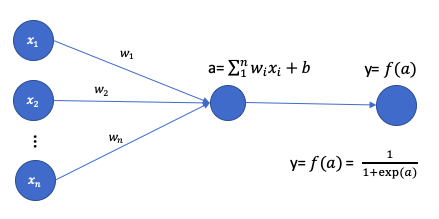

* Notice that the deep learning model take much more time than the logistic model.


In [9]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation 
#from keras.utils.visualize_util import plot
dl_mod = Sequential()
dl_mod.add(Dense(1, input_dim=6)) 
dl_mod.add(Activation(activation='sigmoid'))
#dl_mod.add(Dense(1))
#dl_mod.add(Activation(activation='sigmoid'))
dl_mod.compile(optimizer='RMSprop', loss='mse', metrics=['mean_squared_error'])
dl_mod.fit(x_train, y_train, epochs=600, verbose=0)
score = dl_mod.evaluate(x_test,y_test, verbose=0)
print( dl_mod.metrics_names, score)

['loss', 'mean_squared_error'] [0.11228352040052414, 0.11228352040052414]


In [10]:
dl_ypred = dl_mod.predict(x_train)
pd.DataFrame(dl_ypred)

,0
0,0.002381
1,0.221999
2,0.025847
3,0.990582
4,0.005449
...,...
399,0.992567
400,0.458391
401,0.250994
402,0.000392


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
dl_ypred = dl_mod.predict(x_test)
mean_squared_error(y_test, dl_ypred)

0.11228351080999227

Notice that Dense() and Activation() can be combined into one line of code as below:

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation 
dl_mod = Sequential()
dl_mod.add(Dense(1, input_dim=6, activation='sigmoid'))
dl_mod.compile(optimizer='rmsprop', loss='mse', metrics=['mean_squared_error'])
dl_mod.fit(x_train, y_train, epochs=1000, verbose=0)
score = dl_mod.evaluate(x_test,y_test, verbose=0)
print( dl_mod.metrics_names, score)

['loss', 'mean_squared_error'] [0.5588235259056091, 0.5588235259056091]


### [Learning objective 4] Regression cannot handle multicolinearity
* Notie the warning notes in the end of the summary

In [13]:
# OLS
X_dup = X[features].copy()
X_dup['LSTAT2'] = X_dup['LSTAT'] *2
X_dup['LSTAT3'] = X_dup['LSTAT'] *3
X_dup['LSTAT4'] = X_dup['LSTAT'] *4
mod = sm.OLS(y['Y'], X_dup)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.692
Model:                            OLS   Adj. R-squared (uncentered):              0.688
Method:                 Least Squares   F-statistic:                              187.2
Date:                Thu, 19 Nov 2020   Prob (F-statistic):                   2.22e-124
Time:                        12:01:57   Log-Likelihood:                         -196.40
No. Observations:                 506   AIC:                                      404.8
Df Residuals:                     500   BIC:                                      430.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0009      0.002     -0.424      0.672      -0.005       0.003
ZN             0.0025      0.001      2.715      0.007       0.001       0.004
RM             0.1932      0.013     15.055      0.000       0.168       0.218
AGE           -0.0042      0.001     -4.514      0.000      -0.006      -0.002
DIS           -0.0548      0.012     -4.664      0.000      -0.078      -0.032
LSTAT         -0.0009      0.000     -8.629      0.000      -0.001      -0.001
LSTAT2        -0.0017      0.000     -8.629      0.000      -0.002      -0.001
LSTAT3        -0.0026      0.000     -8.629      0.000      -0.003      -0.002
LSTAT4        -0.0035      0.000     -8.629      0.000      -0.004      -0.003
==============================================================================
Omnibus:                       19.421   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.852
Skew:                           0.292   Prob(JB):                     0.000982
Kurtosis:                       2.439   Cond. No.                     1.14e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.48e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [14]:
# Logistic regression cannot handle multicolinearity
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_dup, y['Y'])
clf_pred = clf.predict_proba(X_dup)[:,1]
clf.score(X_dup, y['Y'])
mean_squared_error(y['Y'], clf_pred)

0.09566923935424808

In [15]:
clf.coef_

array([[-0.03126084,  0.0202013 ,  1.15042326, -0.02406476, -0.55078628,
        -0.01245061, -0.02490122, -0.03735183, -0.04980244]])

### [Learning objective 5] Deep learning is imune of multicolinearity
* Try to change epochs from 1000 to 3000
* Keras does not have a parameter to set the random seed. There are two ways to set seed. 
    * use numpy seed - the best
    * use tensorflow set_random_seed

In [16]:
from numpy.random import seed
seed(1)

#from tensorflow import set_random_seed
#set_random_seed(2)

In [28]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation 
#from keras.utils.visualize_util import plot
dl_dup = Sequential()
dl_dup.add(Dense(1, input_dim=9, activation='sigmoid')) 

dl_dup.compile(optimizer='rmsprop', loss='mse', metrics=['mean_squared_error'])
dl_dup.fit(X_dup, y['Y'], epochs=600, verbose=0)
dl_dup_score = dl_dup.evaluate(X_dup,y['Y'], verbose=0)
print( dl_dup.metrics_names, dl_dup_score)

['loss', 'mean_squared_error'] [0.09585237503051758, 0.09585237503051758]


### [Learning objective 6] Deep learning is imune of multicolinearity

In [18]:
from sklearn.tree import DecisionTreeClassifier # for classification
from sklearn.tree import DecisionTreeRegressor # for regression

# First, specify the model. 
dtree = DecisionTreeClassifier(min_samples_leaf = 10, max_depth = 10)
# Then, train the model.
dtree.fit(X_dup,y['Y'])

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)

In [19]:
dtree_pred = dtree.predict_proba(X_dup)[:,1]
mean_squared_error(y['Y'], dtree_pred)

0.06957760715607728

### [Learning objective 7] Understanding Model Complexity

Assume you are given 
* 10 billion rows, 1111 columns (variables)
* Of these 1111 variables, 1100 are numerical and 10 are categorical with 400 levels each
* 1 target variable (0 or 1)	

Consider two models, which DL model is more complex (more weighting parameters)?
* Model 1: 4 hidden layers with 400 neurons each.
* Model 2: 1 hidden layer with 500 neurons

Let’s compute the number of weightings for each model and compare. In general we multiply the number of neurons in adjacent layers, then add up all the pairs.
(Input layer nodes x hidden layer 1 nodes) + (hidden layer 1 nodes + hidden layer 2 nodes) + … + (final hidden layer nodes x output layer nodes)

In this question we are told we have some categorical variables as inputs. These must be one-hot encoded, with a separate neuron each, for each input. So the 10 categorical will be transformed to 10 x 400 = 4000 dummy variables. Now we have a total of 1100 + 4000 = 5100 input neurons.

Model 1: 
5100 x 400 + 400 x 400 + 400 x 400 + 400 x 400 + 400 x 1 = 2,520,400 weights

Model 2: 5100 x 500 + 500 x 1 = 2,550,500 weights

So Model 2 is more complex.

### [Learning objective 8] Build more hidden layers
* Add one hidden layer

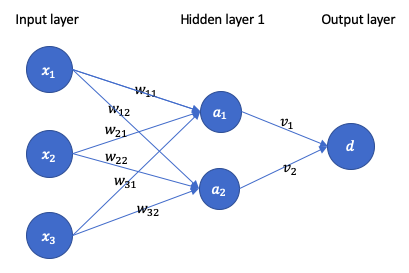

* There is an activation function (sigmod)

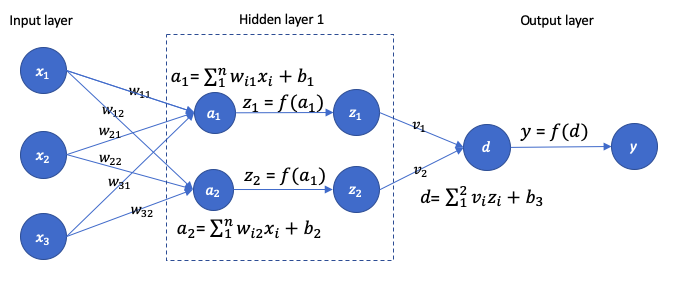


In [29]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation 
#from keras.utils.visualize_util import plot
dl_mod = Sequential()
dl_mod.add(Dense(4, input_dim=6, activation='sigmoid'))
dl_mod.add(Dense(1, activation='sigmoid'))
dl_mod.compile(optimizer='rmsprop', loss='mse', metrics=['mean_squared_error'])
dl_mod.fit(x_train, y_train, epochs=1000, verbose=0)
score = dl_mod.evaluate(x_test,y_test, verbose=0)
print( dl_mod.metrics_names, score)

['loss', 'mean_squared_error'] [0.10282432287931442, 0.10282432287931442]


In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation 
dl_mod = Sequential()
dl_mod.add(Dense(4, input_dim=6, activation='sigmoid')) 
dl_mod.add(Dense(2, activation='sigmoid'))
dl_mod.add(Dense(1, activation='sigmoid'))
dl_mod.compile(optimizer='rmsprop', loss='mse', metrics=['mean_squared_error'])
dl_mod.fit(x_train, y_train, epochs=600, verbose=0)
score = dl_mod.evaluate(x_test,y_test, verbose=0)
print( dl_mod.metrics_names, score)

['loss', 'mean_squared_error'] [0.11216876655817032, 0.11216876655817032]


### [Learning objective 9] Standardize data for better modeling performance
* For a classification model, you are advised to standardize the predictors.

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Activation 
dl_mod = Sequential()
dl_mod.add(Dense(4, input_dim=6, activation='sigmoid')) 
dl_mod.add(Dense(2, activation='sigmoid'))
dl_mod.add(Dense(1, activation='sigmoid'))
dl_mod.compile(optimizer='rmsprop', loss='mse', metrics=['mean_squared_error'])
dl_mod.fit(x_train_scaled, y_train, epochs=600, verbose=0)
score = dl_mod.evaluate(x_test_scaled,y_test, verbose=0)
print( dl_mod.metrics_names, score)

['loss', 'mean_squared_error'] [0.09813830256462097, 0.09813830256462097]


### [Learning objective 10] L1 and L2 Regularization

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Activation 
from keras import regularizers
dl_mod = Sequential()
dl_mod.add(Dense(4, input_dim=6, activation='sigmoid')) 
dl_mod.add(Dense(2, activation='sigmoid'))
dl_mod.add(Dense(1, activation='sigmoid'))
kernel_regularizer=regularizers.l1(0.01)
dl_mod.compile(optimizer='rmsprop', loss='mse', metrics=['mean_squared_error'])
dl_mod.fit(x_train_scaled, y_train, epochs=600, verbose=0)
score = dl_mod.evaluate(x_test_scaled,y_test, verbose=0)
print( dl_mod.metrics_names, score)

['loss', 'mean_squared_error'] [0.09434328973293304, 0.09434328973293304]


In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation 
from keras import regularizers
dl_mod = Sequential()
dl_mod.add(Dense(4, input_dim=6, activation='sigmoid')) 
dl_mod.add(Dense(2, activation='sigmoid'))
dl_mod.add(Dense(1, activation='sigmoid'))
kernel_regularizer=regularizers.l2(0.01)
dl_mod.compile(optimizer='rmsprop', loss='mse', metrics=['mean_squared_error'])
dl_mod.fit(x_train_scaled, y_train, epochs=600, verbose=0)
score = dl_mod.evaluate(x_test_scaled,y_test, verbose=0)
print( dl_mod.metrics_names, score)

['loss', 'mean_squared_error'] [0.09841769188642502, 0.09841769188642502]


### [Learning objective 11] Dropout Regularization

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Activation , Dropout
from keras import regularizers
dl_mod = Sequential()
dl_mod.add(Dense(4, input_dim=6, activation='sigmoid')) 
dl_mod.add(Dropout(0.25))
dl_mod.add(Dense(2, activation='sigmoid'))
dl_mod.add(Dropout(0.25))
dl_mod.add(Dense(1, activation='sigmoid'))
dl_mod.compile(optimizer='rmsprop', loss='mse', metrics=['mean_squared_error'])
dl_mod.fit(x_train_scaled, y_train, epochs=600, verbose=0)
score = dl_mod.evaluate(x_test_scaled,y_test, verbose=0)
print( dl_mod.metrics_names, score)

['loss', 'mean_squared_error'] [0.0974554643034935, 0.0974554643034935]
